In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files

In [2]:
uploaded = files.upload()

Saving cleaned_weather.csv to cleaned_weather.csv


In [3]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df_daily = df.groupby(df['date'].dt.date)[['p', 'Tlog']].mean().reset_index()
df_daily['date'] = pd.to_datetime(df_daily['date'])

In [6]:

df_daily['Year'] = df_daily['date'].dt.year
df_daily['Month'] = df_daily['date'].dt.month
df_daily['Day'] = df_daily['date'].dt.day


In [7]:
X = df_daily[['Year', 'Month', 'Day']]
y = df_daily['p']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [9]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 114.91


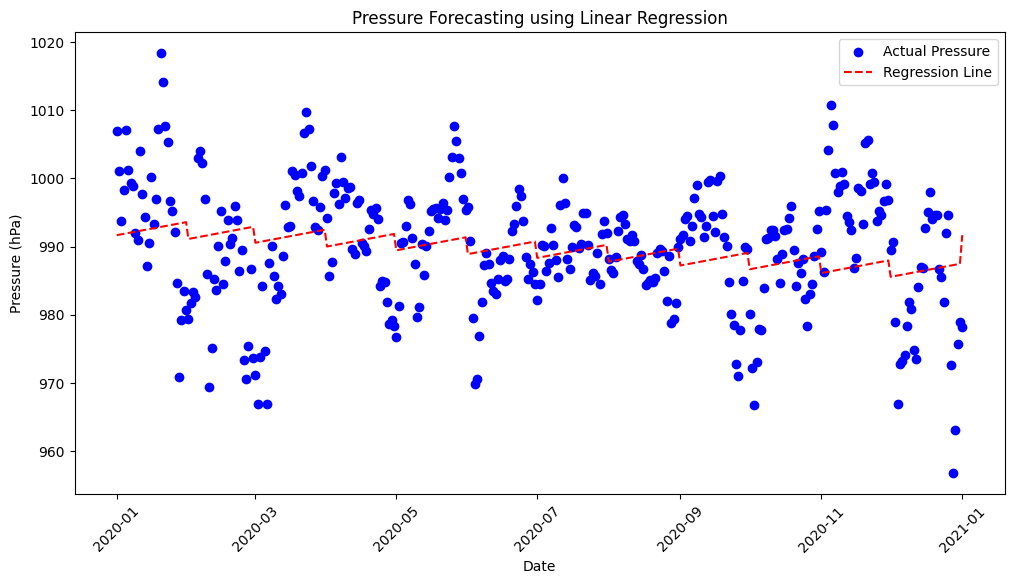

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(df_daily['date'], df_daily['p'], label='Actual Pressure', color='blue', marker='o')
plt.plot(df_daily['date'], model.predict(X), label='Regression Line', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Forecasting using Linear Regression')
plt.xticks(rotation=45)
plt.legend()
plt.show()